In [55]:
import pandas as pd

In [56]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [57]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-06-27,31.06,1037,3
1,Salvador,2018-11-25,19.02,1034,3
2,Salvador,2019-03-11,NaN,1035,3
3,Salvador,2019-01-07,176.34,1037,3
4,Salvador,2019-03-09,19.47,1037,3


In [58]:
df = pd.concat([df1,df2,df3,df4,df5])

In [59]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1520,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [60]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-06-27,31.06,1037,3
1,Salvador,2018-11-25,19.02,1034,3
2,Salvador,2019-03-11,NaN,1035,3
3,Salvador,2019-01-07,176.34,1037,3
4,Salvador,2019-03-09,19.47,1037,3


In [61]:
#Pegando uma amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
3,Recife,2019-01-07,160.54,981,3
4,Natal,2019-03-09,699.00,853,5
1,Fortaleza,2019-01-01,115.51,1002,3
4,Recife,2019-03-09,19.89,983,7
1,Aracaju,2018-01-01,14.21,1520,6


In [62]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [63]:
#Mudando o tipo de dados
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [64]:
#Verificando se tem valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    2
LojaID    0
Qtde      0
dtype: int64

In [65]:
#Substitui valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

#Substitui valores nulos por zero
#df["Vendas"].fillna(0, inplace=True)

#Remove linhas com valores nulos
#df.dropna(inplace=True)

#Remove linhas que estejam com valores nulos com base em uma coluna
#df.dropna(subset=["Vendas"], inplace=True)

#Remove linhas que estejam com valores faltantes em todas as colunas
#df.dropna(how="all", inplace=True)


df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [66]:
#Criando colunas novas
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1520,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [67]:
#Retornando a maior receita
df["Receita"].max()

3495.0

In [68]:
#Retornando a maior receita
df["Receita"].min()

11.44

In [69]:
#Retornar as três linhas com maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
4,Natal,2019-03-09,699.0,853,5,3495.0
0,Natal,2018-06-27,606.0,853,2,1212.0
1,Natal,2018-11-25,563.0,853,2,1126.0


In [70]:
#Retornar as três linhas com menores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
1,Recife,2018-11-25,11.44,983,1,11.44
3,Aracaju,2018-01-01,3.01,1521,7,21.07
1,Salvador,2018-11-25,19.02,1034,3,57.06


In [71]:
#Retornar a soma das receitas por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       515.960000
Fortaleza     754.260000
Natal        7068.465217
Recife        859.600000
Salvador     1160.135217
Name: Receita, dtype: float64

In [72]:
#Ordenado os dados pela receita
df.sort_values("Receita", ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
4,Natal,2019-03-09,699.00,853,5,3495.00
0,Natal,2018-06-27,606.00,853,2,1212.00
1,Natal,2018-11-25,563.00,853,2,1126.00
3,Natal,2019-01-07,271.00,854,3,813.00
3,Salvador,2019-01-07,176.34,1037,3,529.02


In [76]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [81]:
#Mudando o tipo de dados da data para Inteiro, para poder testar a transformação
df["Data"] = df["Data"].astype("int64")
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [82]:
#Transformando a coluna data em data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [84]:
#Retornando a receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    3178.250000
2019    7180.170435
Name: Receita, dtype: float64

In [89]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [85]:
#Criando uma coluna de ano de venda
df["Ano_Venda"] = df["Data"].dt.year

In [86]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
2,Salvador,2019-03-11,140.821739,1035,3,422.465217,2019
3,Fortaleza,2019-02-01,20.950000,1004,6,125.700000,2019
2,Natal,2019-03-11,140.821739,852,3,422.465217,2019
3,Salvador,2019-01-07,176.340000,1037,3,529.020000,2019
0,Salvador,2018-06-27,31.060000,1037,3,93.180000,2018


In [87]:
#Criando uma coluna para mês venda e outro para dia da venda
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [88]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
2,Recife,2019-03-11,12.94,983,5,64.70,2019,3,11
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
0,Fortaleza,2019-01-01,45.27,1002,2,90.54,2019,1,1
3,Salvador,2019-01-07,176.34,1037,3,529.02,2019,1,7
1,Aracaju,2018-01-01,14.21,1520,6,85.26,2018,1,1


In [90]:
#Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [91]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
3,Natal,2019-01-07,271.000000,854,3,813.000000,2019,1,7,371 days
2,Natal,2019-03-11,140.821739,852,3,422.465217,2019,3,11,434 days
2,Salvador,2019-03-11,140.821739,1035,3,422.465217,2019,3,11,434 days
1,Fortaleza,2019-01-01,115.510000,1002,3,346.530000,2019,1,1,365 days
2,Recife,2019-03-11,12.940000,983,5,64.700000,2019,3,11,434 days


In [92]:
#Criando uma coluna de trimestre
df["Trimestre da venda"] = df["Data"].dt.quarter

In [93]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre da venda
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,2019,1,1,365 days,1
0,Fortaleza,2019-01-01,45.27,1002,2,90.54,2019,1,1,365 days,1
0,Salvador,2018-06-27,31.06,1037,3,93.18,2018,6,27,177 days,2
2,Recife,2019-03-11,12.94,983,5,64.70,2019,3,11,434 days,1
2,Fortaleza,2019-02-01,35.33,1004,3,105.99,2019,2,1,396 days,1


In [94]:
#Filtrando  as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [95]:
vendas_marco_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre da venda
2,Natal,2019-03-11,140.821739,852,3,422.465217,2019,3,11,434 days,1
4,Natal,2019-03-09,699.000000,853,5,3495.000000,2019,3,9,432 days,1
2,Recife,2019-03-11,12.940000,983,5,64.700000,2019,3,11,434 days,1
4,Recife,2019-03-09,19.890000,983,7,139.230000,2019,3,9,432 days,1
2,Salvador,2019-03-11,140.821739,1035,3,422.465217,2019,3,11,434 days,1


In [96]:
#Conta as linhas de cada Loja
df["LojaID"].value_counts(ascending=False)

1520    3
1004    3
853     3
983     3
1037    3
1002    2
981     2
1521    1
1522    1
852     1
854     1
1034    1
1035    1
Name: LojaID, dtype: int64

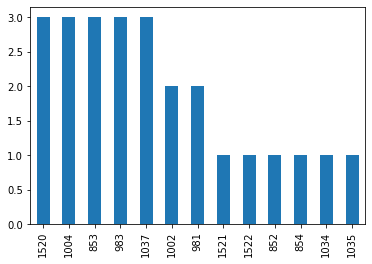

In [97]:
df["LojaID"].value_counts(ascending=False).plot.bar()

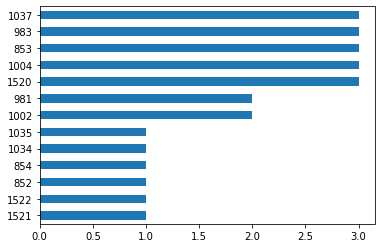

In [100]:
df["LojaID"].value_counts(ascending=True).plot.barh()

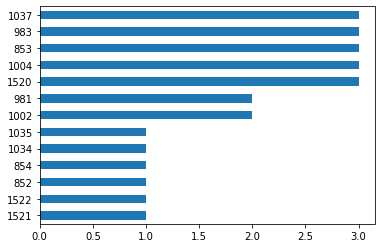

In [101]:
df["LojaID"].value_counts(ascending=True).plot.barh();

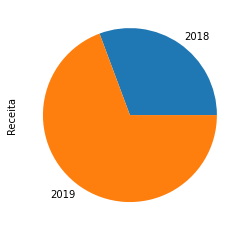

In [102]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [103]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Aracaju      5
Fortaleza    5
Natal        5
Recife       5
Salvador     5
Name: Cidade, dtype: int64

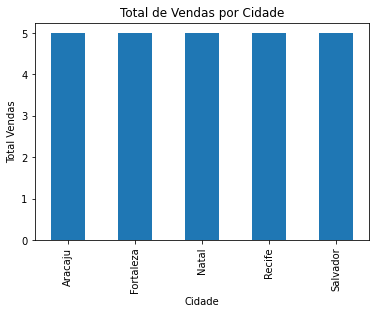

In [104]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

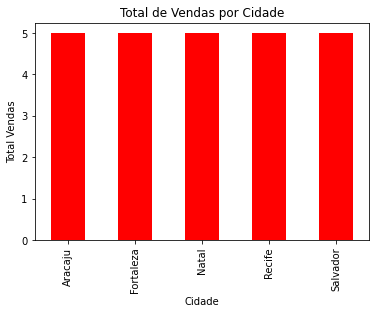

In [105]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [106]:
#Alterando o estilo
plt.style.use('ggplot')

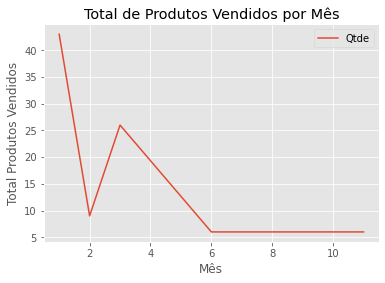

In [114]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [108]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     43
2      9
3     26
6      6
11     6
Name: Qtde, dtype: int64

In [109]:
#Selecionanando apenas o ano de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

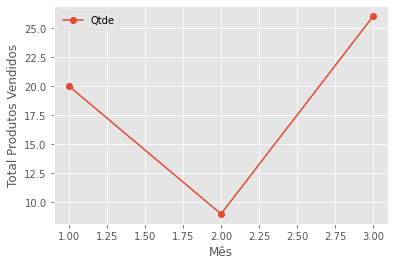

In [113]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

(array([ 4.,  3., 10.,  0.,  0.,  2.,  0.,  3.,  2.,  1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

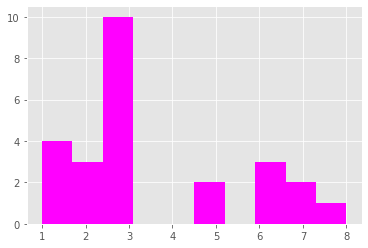

In [117]:
plt.hist(df["Qtde"], color='magenta')

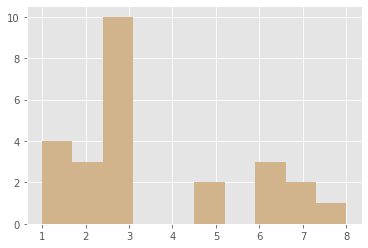

In [119]:
plt.hist(df["Qtde"], color='tan');

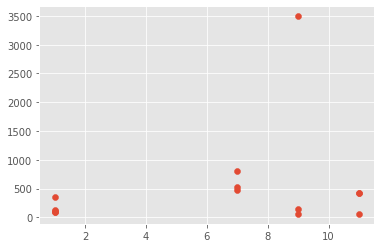

In [120]:
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

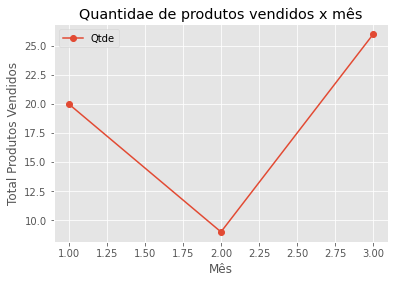

In [121]:
#Salvando as imagens
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.title("Quantidae de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();
plt.savefig("grafico_QTDE_MES.png")